In [34]:
from CollectMaPSAs import *
import ROOT
import cPickle
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.special import erf

In [35]:
mapsa_names = ["HPK44_1"]

In [36]:
mapsas = []
for m in mapsa_names:
    # Read MaPSA object from file, if available
    fname = 'pickles/'+m+'.pkl'
    if os.path.isfile(fname):
        print("Loading MaPSA " + m)
        mapsa = cPickle.load(open(fname,'rb'))
    else: # Create it
        print("MaPSA " + m +" has no pickle")

    mapsas += [mapsa]

Loading MaPSA HPK44_1


In [37]:
whichcurve = "CAL_posttrim"

chip = mapsas[0].mpa_chips[0]
        
if whichcurve == "CAL_pretrim":
    curves_all = chip.CALS_pretrim.transpose()[0:256]
    rms_fit_all = chip.pixels["CAL_RMS_pretrim"]
    mean_fit_all = chip.pixels["CAL_Mean_pretrim"]
elif whichcurve == "CAL_posttrim":
    curves_all = chip.CALS.transpose()[0:256]
    rms_fit_all = chip.pixels["CAL_RMS"]
    mean_fit_all = chip.pixels["CAL_Mean"]
#elif whichcurve == "THR_pretrim":
#    curves_all = chip.THRS_pretrim.transpose()[0:256]
#    rms_fit_all = chip.pixels["THR_RMS_pretrim"]
#    mean_fit_all = chip.pixels["THR_Mean_pretrim"]
#elif whichcurve == "THR_posttrim":
#    curves_all = chip.THRS.transpose()[0:256]
#    rms_fit_all = chip.pixels["THR_RMS"]
#    mean_fit_all = chip.pixels["THR_Mean"]
elif whichcurve == "Bump":
    curves_all = chip.BumpS.transpose()[0:256]
    rms_fit_all = chip.pixels["Bump_RMS"]
    mean_fit_all = chip.pixels["Bump_Mean"]

In [38]:
def derivative(curve):
    h = ROOT.TH1D('h','h',256,0,256)
    y = np.diff(curve) 
    for i in range(0,255):
        h.SetBinContent(i+1,y[i])
    return [h.GetMean(),h.GetRMS()]

In [39]:
curves = curves_all
mean_fit = mean_fit_all
rms_fit = rms_fit_all

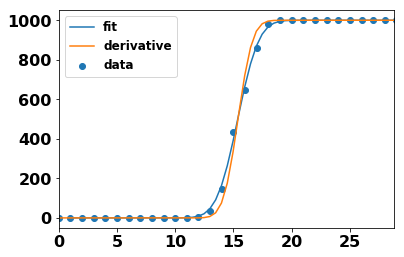

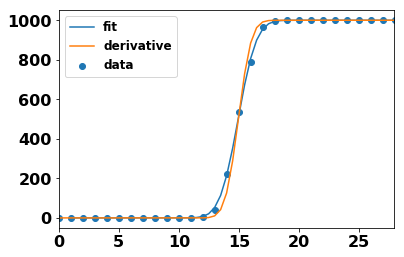

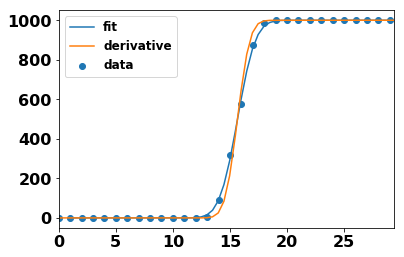

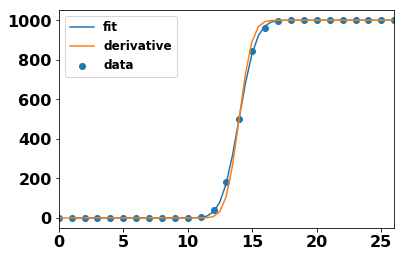

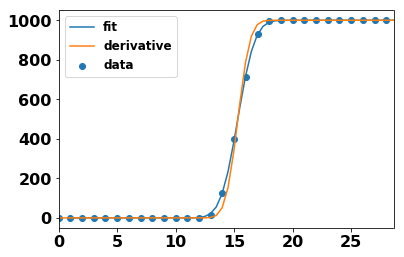

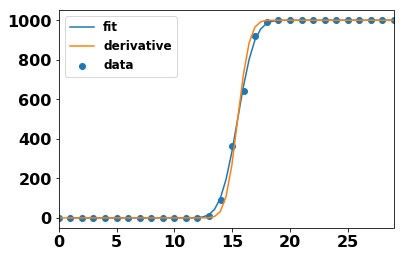

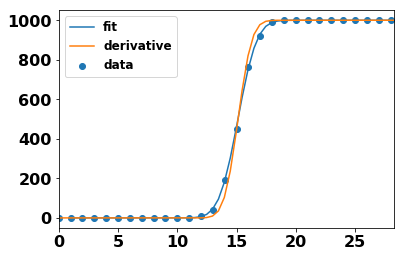

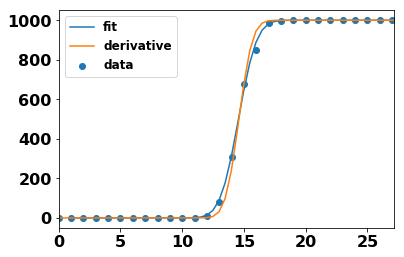

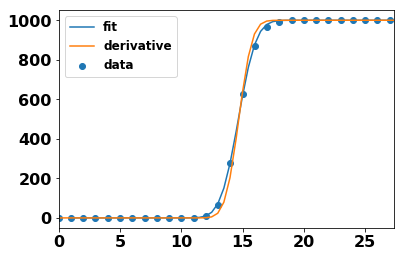

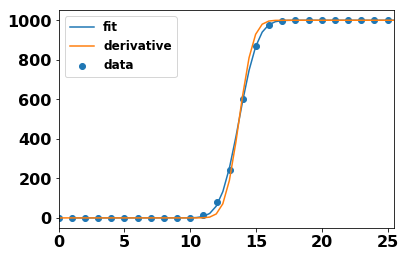

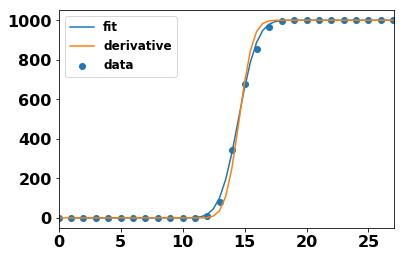

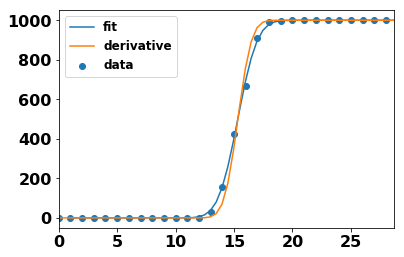

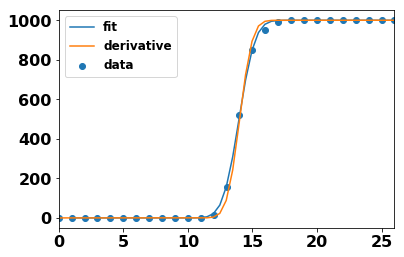

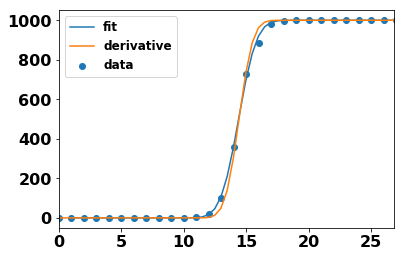

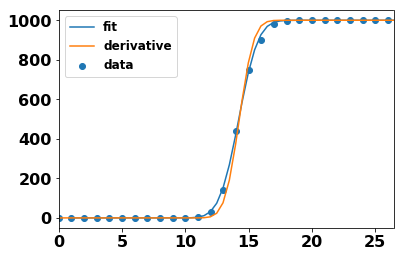

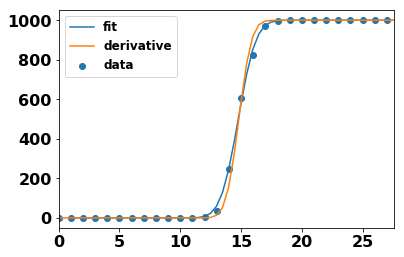

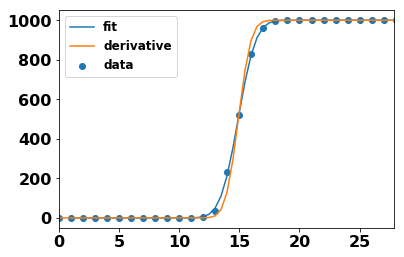

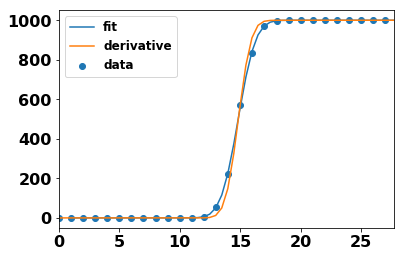

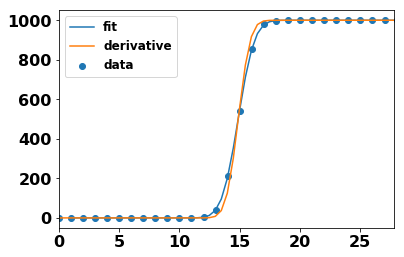

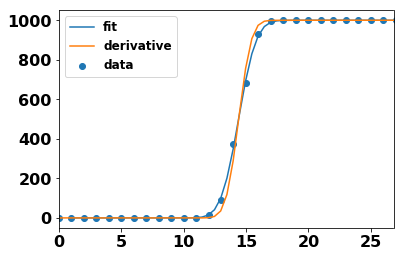

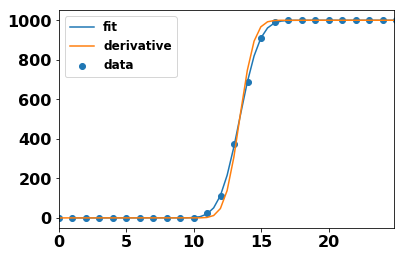

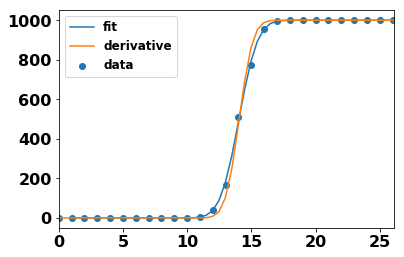

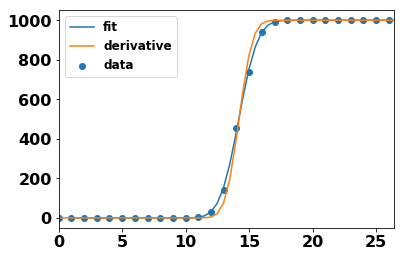

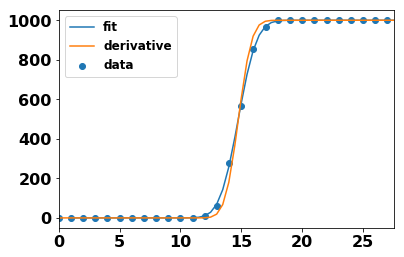

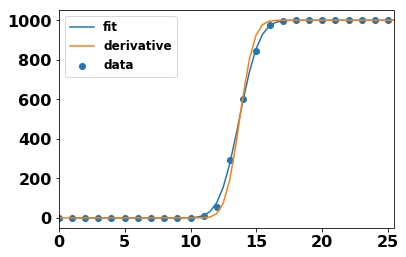

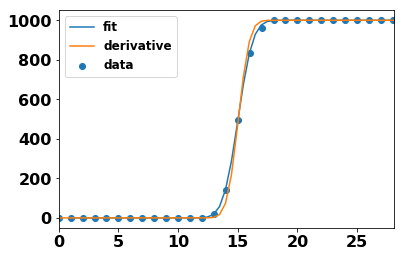

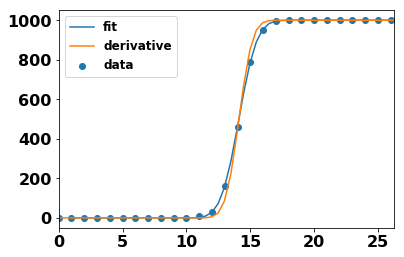

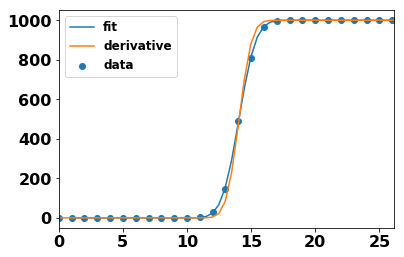

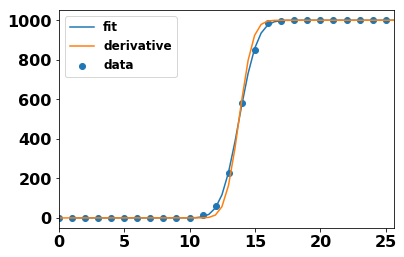

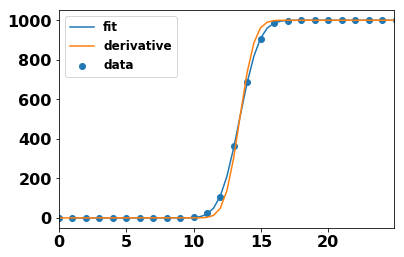

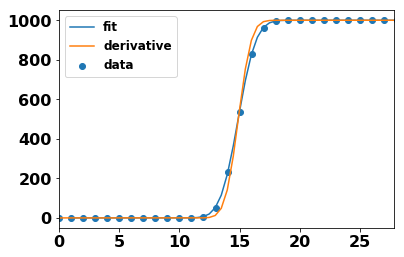

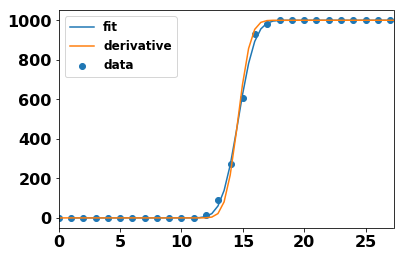

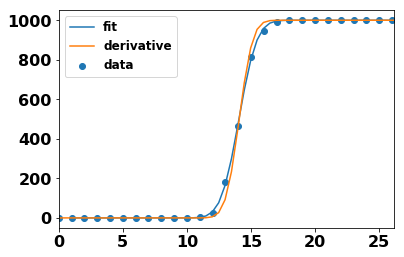

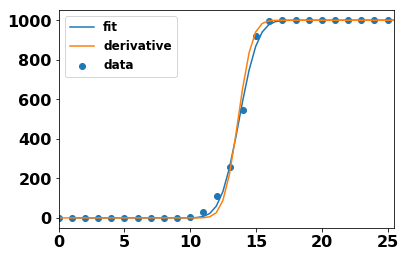

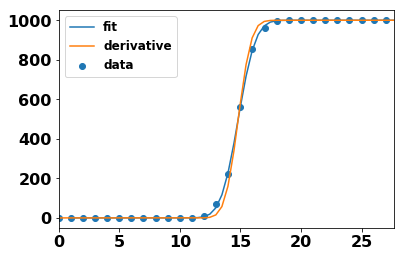

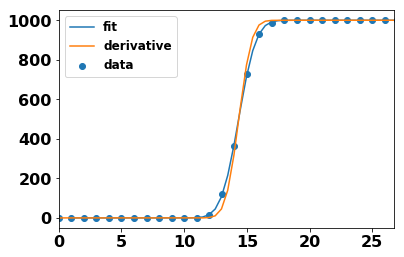

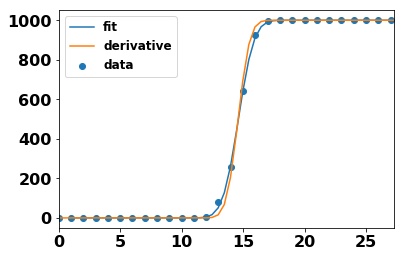

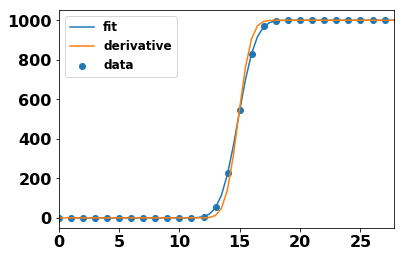

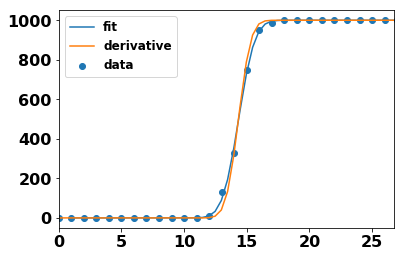

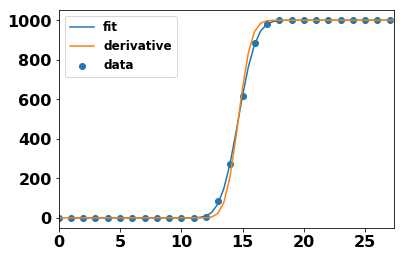

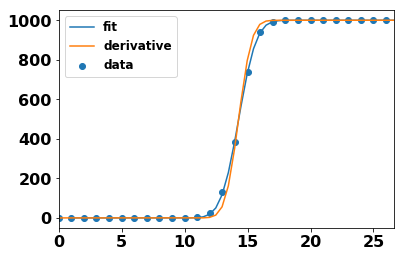

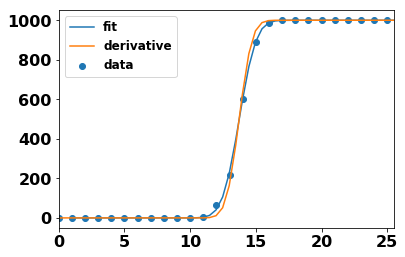

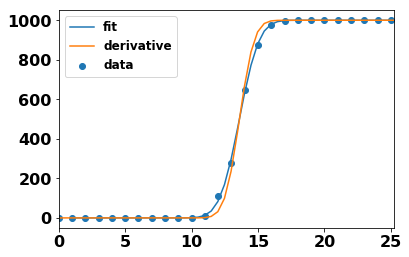

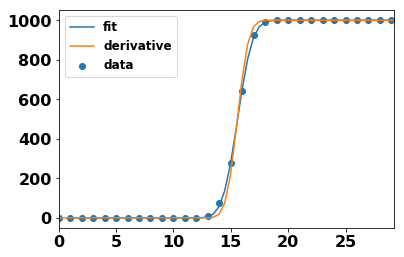

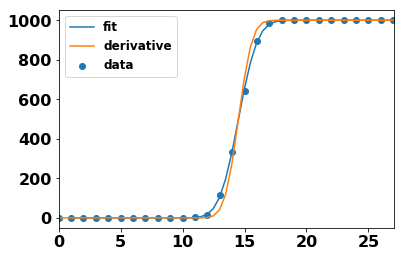

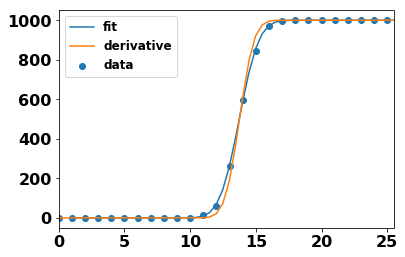

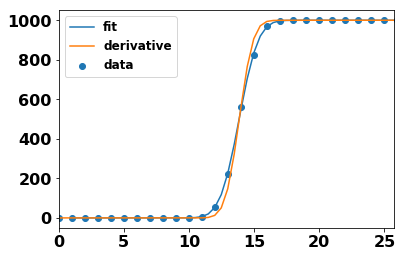

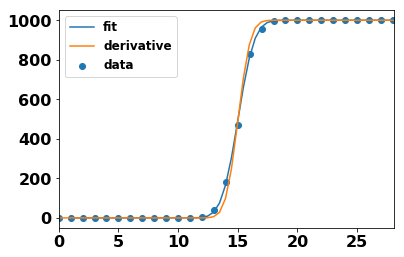

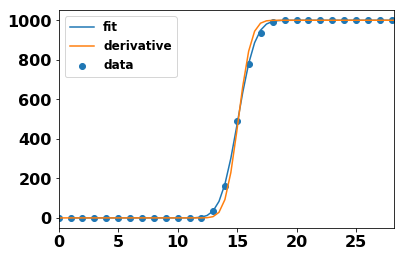

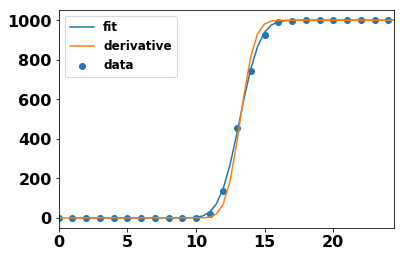

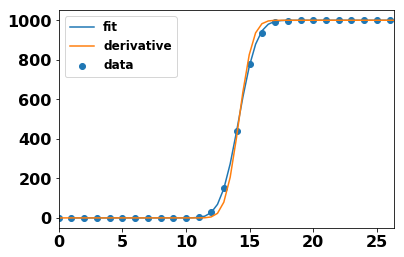

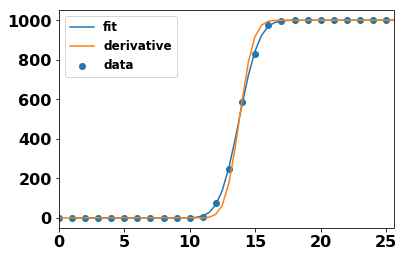

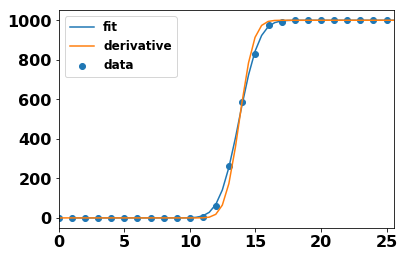

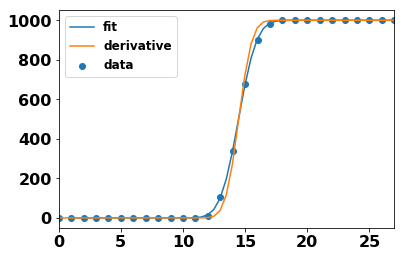

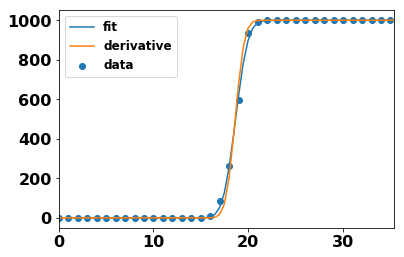

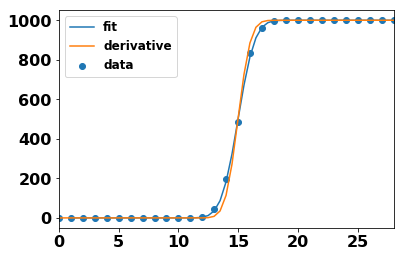

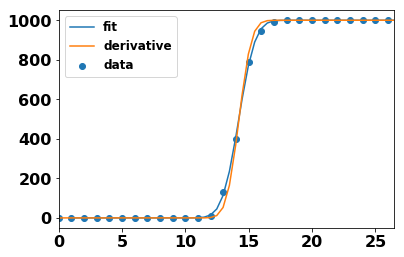

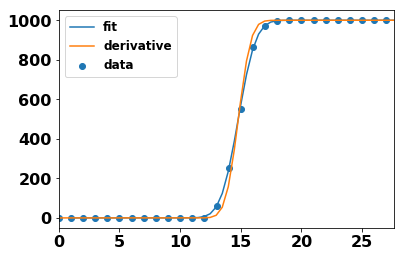

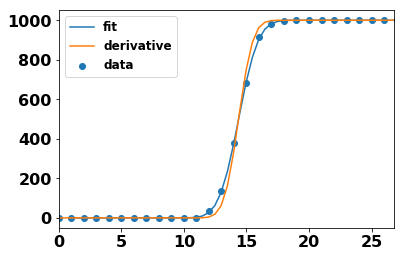

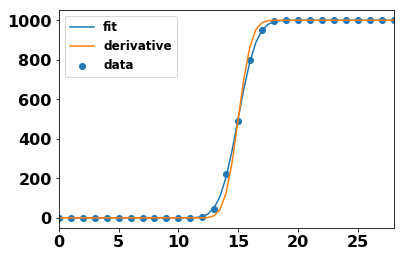

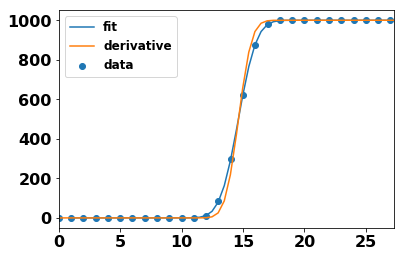

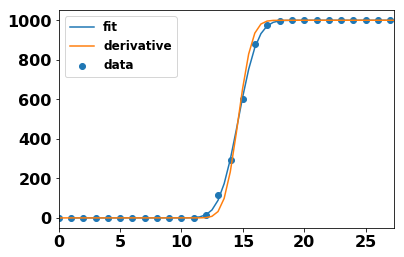

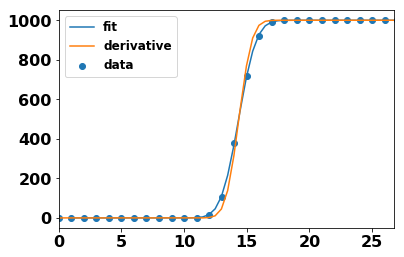

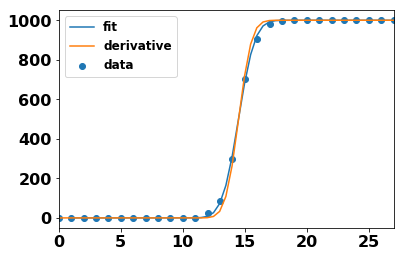

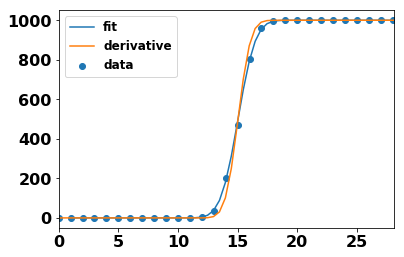

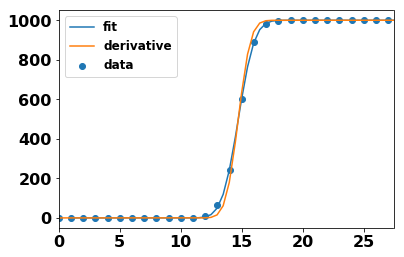

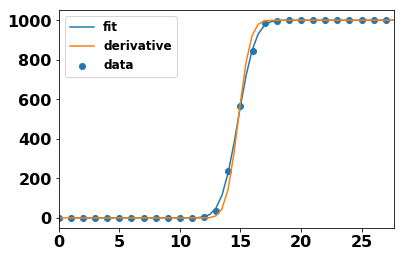

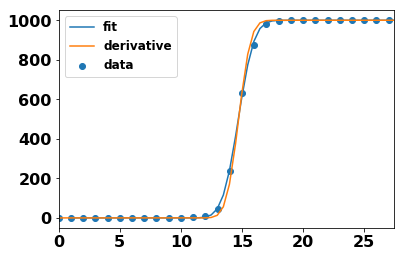

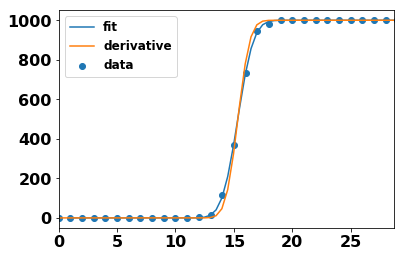

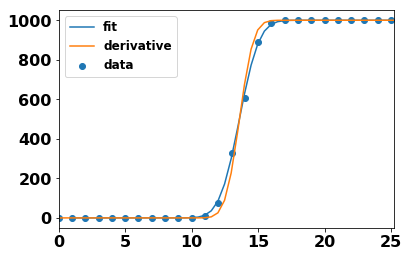

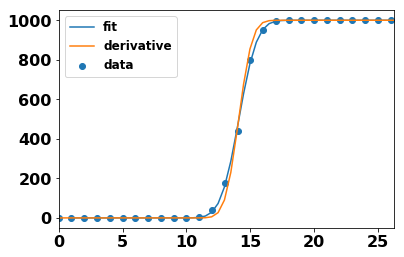

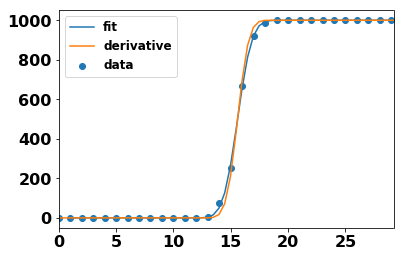

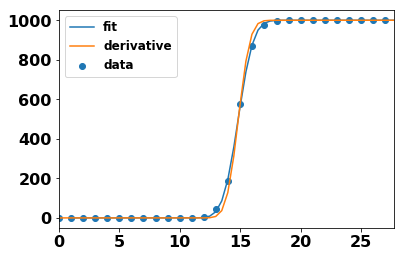

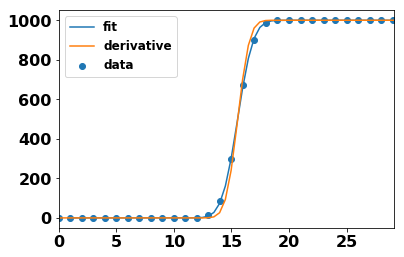

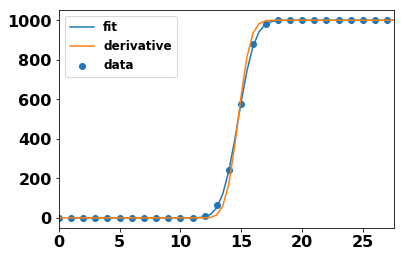

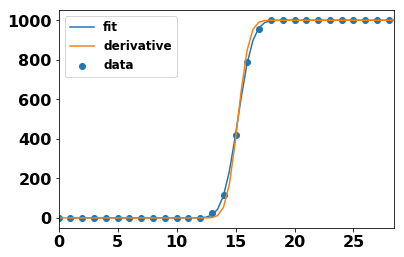

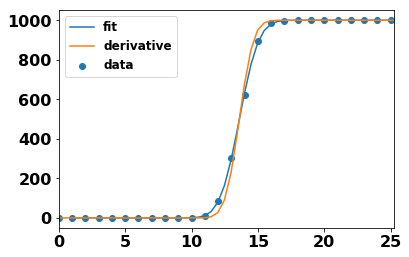

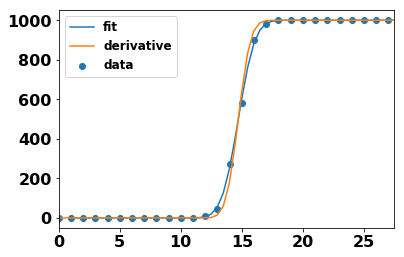

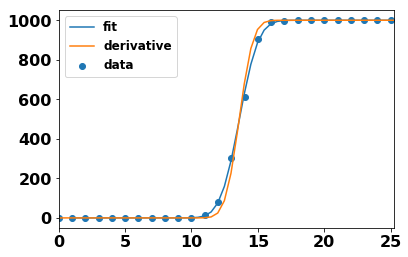

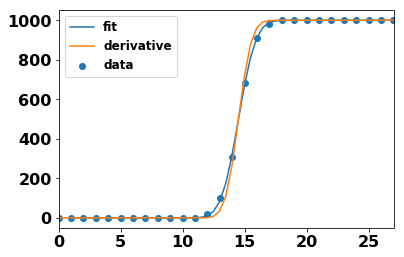

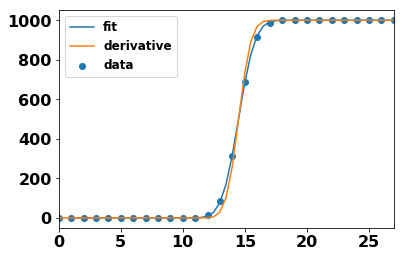

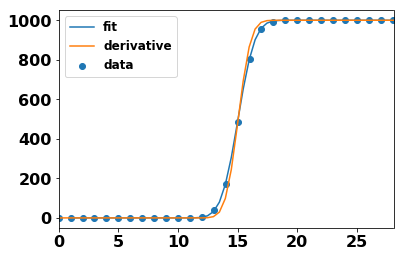

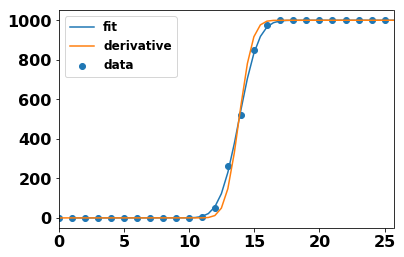

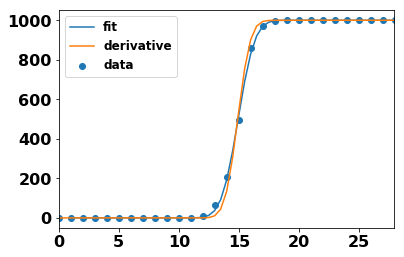

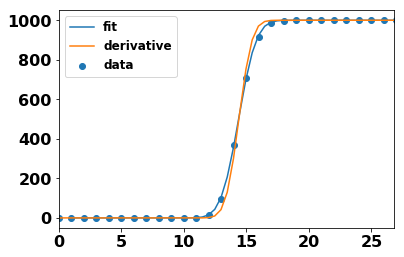

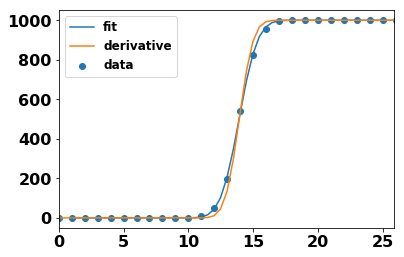

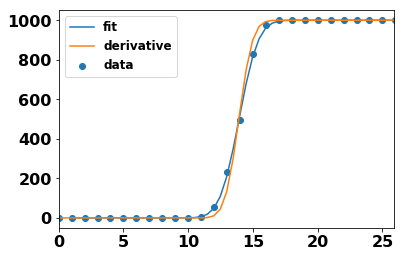

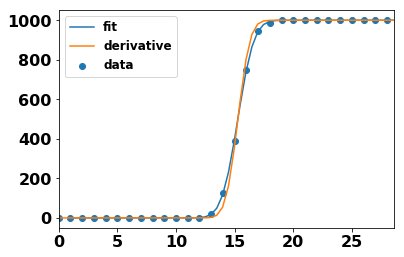

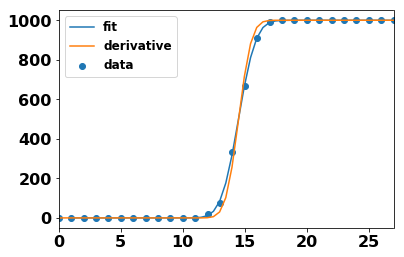

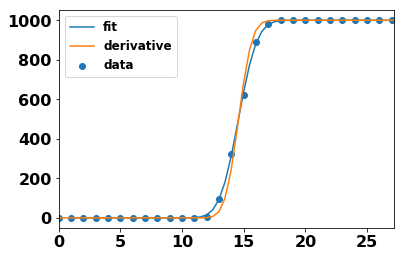

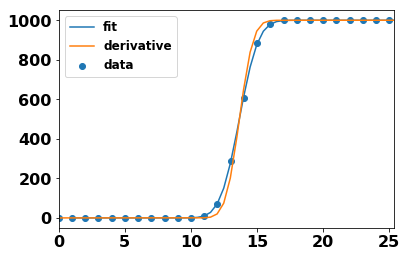

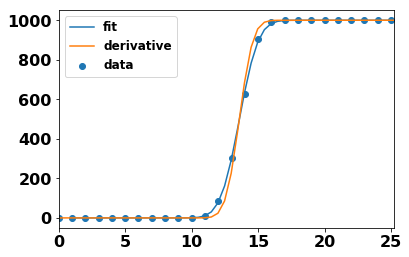

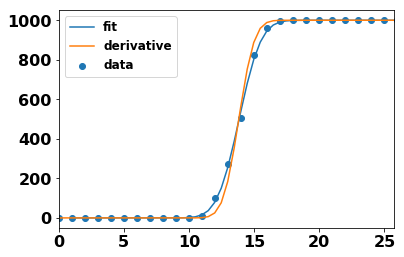

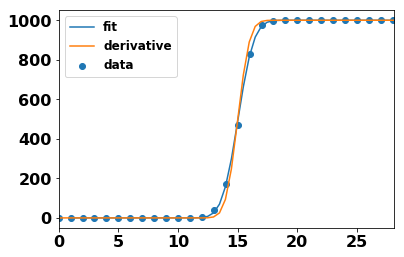

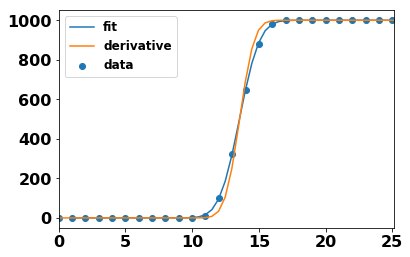

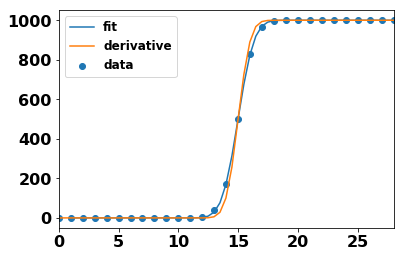

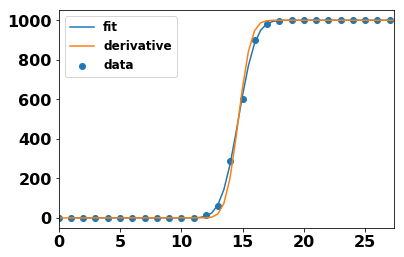

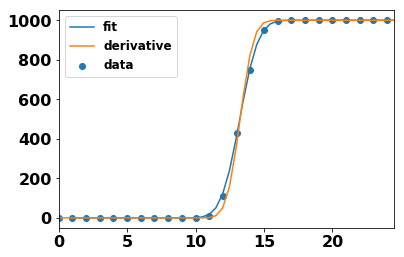

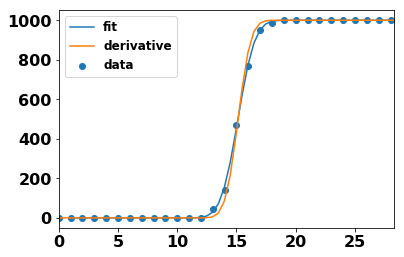

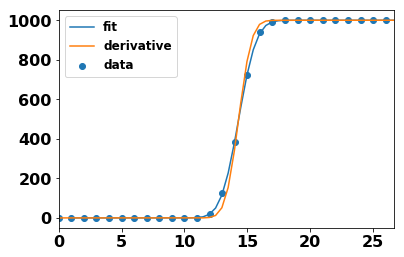

In [40]:
mean_der = []
rms_der = []

for i in range(0,curves.shape[1]):
    out = derivative(curves[i])
    mean_der += [out[0]]
    rms_der += [out[1]]
    
    #print(mean_der[i],mean_fit[i])
    
    if i<100:
        fig, ax = plt.subplots()
        plt.scatter(np.linspace(0,255,256),curves[i],label='data')

        curve_fit = [500*(1+erf((x-mean_fit[i])/rms_fit[i])) for x in np.linspace(0,255,512)]
        plt.plot(np.linspace(1,256,512),curve_fit,label='fit')
        
        curve_der = [500*(1+erfc((x-out[0])/out[1])) for x in np.linspace(0,255,512)]
        curve_der = [500*(1+erf((x-out[0])/out[1])) for x in np.linspace(0,255,512)]
        
        plt.plot(np.linspace(0,255,512),curve_der,label='derivative')
        
        ax.set_xlim(0,2*mean_fit[i])
        plt.legend(loc='upper left',prop={'size': 12});

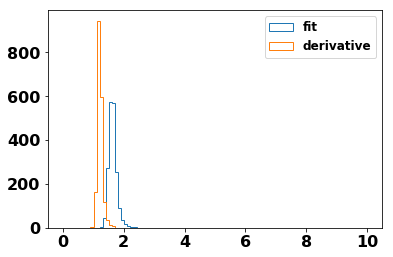

In [41]:
plt.hist(rms_fit,histtype='step',bins=np.linspace(0,10,100));
plt.hist(rms_der,histtype='step',bins=np.linspace(0,10,100));
plt.legend(['fit','derivative'],loc='upper right',prop={'size': 12});

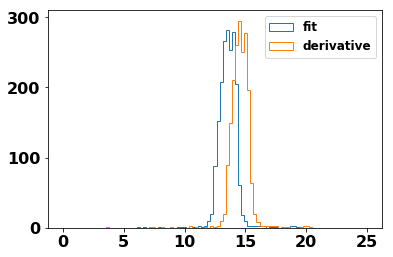

In [42]:
plt.hist(mean_fit,histtype='step',bins=np.linspace(0,25,100));
plt.hist(mean_der,histtype='step',bins=np.linspace(0,25,100));
plt.legend(['fit','derivative'],loc='upper right',prop={'size': 12})

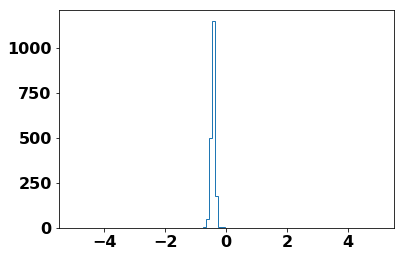

In [43]:
plt.hist(rms_der-rms_fit,bins=np.linspace(-5,5,100),histtype='step');

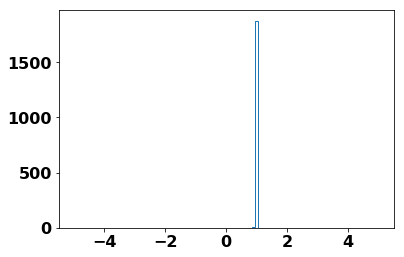

In [44]:
plt.hist(mean_der-mean_fit,bins=np.linspace(-5,5,100),histtype='step');